
## Overview:
This project focuses on analyzing rat neural data obtained from video recordings. The goal is to understand neural dynamics during specific activities.

## Objective:
- **Data Loading:** Load and preprocess rat neural data from various sources.
- **Exploratory Data Analysis (EDA):** Understand the structure and patterns in neural activity.
- **Conditional GAN Implementation:** Implement Conditional Generative Adversarial Networks (cGANs) to generate visual representations from neural data.
- **Visualization and Analysis:** Visualize and interpret the generated data to gain insights into neural dynamics.

## Steps:
1. **Data Preparation:** Loading multiple data sources (mat files, video frames).
2. **Exploratory Data Analysis:** Understanding neural activity patterns and relationships.
3. **cGAN Implementation:** Building and training cGAN models on rat neural data.
4. **Data Generation:** Generating visual representations from neural data using cGANs.


## Libraries Used:
- `tensorflow`
- `time`
- `os`
- `random`
- `keras.optimizers.Adam`
- `tensorflow.keras.layers`
- `tensorflow.keras.models.Model`
- `numpy`
- `numpy.expand_dims`
- `numpy.zeros`
- `numpy.ones`
- `numpy.randn`
- `numpy.randint`
- `PIL.Image`
- `scipy.io.loadmat`
- `scipy.signal.filtfilt`
- `scipy.signal.windows`
- `warnings`
- `matplotlib.pyplot`
- `keras.layers.Dropout`
- `keras.layers.Concatenate`
- `keras.layers.UpSampling2D`
- `keras.layers.Reshape`
- `keras.layers.Activation`
- `keras.layers.Conv2D`
- `keras.layers.BatchNormalization`
- `keras.layers.LeakyReLU`
- `keras.layers.Input`
- `keras.layers.Flatten`
- `keras.layers.multiply`
- `keras.layers.Dense`
- `keras.layers.Embedding`
- `keras.models.Sequential`

***Import Required Libraries***

In [4]:
import tensorflow as tf
import time
import os
import random
from keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
import numpy as np
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from PIL import Image
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Concatenate
from scipy.signal import filtfilt, windows
# supress warnings
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from scipy.io import loadmat
from keras.layers import Dropout, Concatenate
from keras.layers import UpSampling2D, Reshape, Activation, Conv2D, BatchNormalization, LeakyReLU, Input, Flatten, multiply
from keras.layers import Dense, Embedding
from keras.models import Sequential, Model

***Import Data***

In [5]:
# Define the file paths for the datasets
file_path_1 = 'C:\\Users\\Chandra\\Desktop\\Model\\data\\day10_adv_ms.mat'
file_path_2 = 'C:\\Users\\Chandra\\Desktop\\Model\\data\\2011-04-23_day10.mat'

# Define directories for data access
data_directory_1 = "C:\\Users\\Chandra\\Desktop\\Model\\data\\"
data_directory_2 = "C:\\Users\\Chandra\\Desktop\\Model\\data\\reach_video_data\\"

# Check if both files exist before proceeding
if os.path.exists(file_path_1) and os.path.exists(file_path_2):
    # Load the datasets if files exist
    day10_adv_ms = loadmat(file_path_1)
    day10 = loadmat(file_path_2)

    # Load multiple files using a loop
    num_files = 65  # Number of files to load (0 to 65)
    loaded_files = []
    for i in range(num_files):
        file_name = f'day10_frame_reach_vid_nofrz_reach{i}.npy'
        file_path = os.path.join(data_directory_2, file_name)
        if os.path.exists(file_path):
            loaded_file = np.load(file_path)
            loaded_files.append(loaded_file)
        else:
            print(f"File '{file_name}' does not exist.")

    # Convert loaded files into a numpy array
    loaded_array = np.array(loaded_files)

    # Additional data loading
    frame_reach_unit = np.load(data_directory_1 + 'day10_frame_reach_unit.npy')
    tr_adv_ms = day10_adv_ms['tr_adv_ms']
    s = day10['s']
else:
    # Handle the case where either or both files do not exist
    print("One or both files do not exist:", file_path_1, file_path_2)

**Exploratory Data Analysis**

In [6]:
loaded_array.shape
all_frames = np.transpose(loaded_array, (0, 3, 1, 2))
all_frames.shape

(65, 820, 299, 299)

The `all_frames` shape represents the loaded rat neural video data, comprising:
- **65 reaches:** These are distinct instances or events observed in the neural data.
- **820 frames:** Each reach contains 820 fram.h.
- **299 x 299:** The frames have a spatial resolution of 299 x 299 pixels (height x widtdata.


In [7]:

# Create an empty array to store resized images with shape (65, 820, 80, 80)
resized_images = np.zeros((65, 820, 80, 80), dtype=np.uint8) 

# Loop through each day and each image in a day for resizing
for i in range(all_frames.shape[0]):  # Loop through each reach
    for j in range(all_frames.shape[1]):  # Loop through each image in a reach
        # Resize each image to 80x80 while maintaining aspect ratio directly using NumPy
        resized_img = np.array(Image.fromarray(all_frames[i, j]).resize((80, 80), Image.LANCZOS))
        # Store the resized image in the new array
        resized_images[i, j] = resized_img

# The variable resized_images now contains the resized images with shape (65, 820, 80, 80).
# Here, images originally sized 299x299 pixels are resized to 80x80 pixels to facilitate efficient processing and analysis.


In [9]:
#copying the data to all_frames
all_frames =resized_images

In [10]:
# Create an empty list to store extracted frames representing specific instances relative to each reach
all_image = []

# Loop through each reach in the dataset
for i in range(all_frames.shape[0]):
    # Extract frames representing different instances relative to each reach:
    # - Frame at index 410: Before the reach
    # - Frame at index 510: During the reach
    # - Frame at index 610: After the reach
    sub_frames_before = all_frames[i, 410, :, :]  # Extract frame before reach (at index 410)
    sub_frames_during = all_frames[i, 510, :, :]  # Extract frame during reach (at index 510)
    sub_frames_after = all_frames[i, 610, :, :]   # Extract frame after reach (at index 610)

    # Append the extracted frames to the list 'all_image'
    all_image.append(sub_frames_before)  # Append frame before reach to 'all_image'
    all_image.append(sub_frames_during)  # Append frame during reach to 'all_image'
    all_image.append(sub_frames_after)   # Append frame after reach to 'all_image'

# The 'all_image' list now contains frames extracted at specific instances relative to each reach:
# - Frames at index 410 represent frame before the reach.
# - Frames at index 510 represent frame during the reach.
# - Frames at index 610 represent frame after the reach.


In [11]:
# Convert the list 'all_image' containing extracted frames into a NumPy array
all_frames = np.array(all_image)

# Tile the 'all_frames' array to duplicate its content for further processing
# This creates a new array by repeating 'all_frames' twice along the first dimension
# The resulting shape becomes (2 * number of reaches, number of instances per reach, frame dimensions)
all_frames = np.tile(all_frames, (2, 1, 1))


In [12]:
# List containing specific labels representing instances relative to each reach
all_sublabels = [410, 510, 610]


In [13]:
# Create a list 'newlabels' to store labels for instances relative to each of the 65 reaches
newlabels = []

# Iterate through the range of reaches (65 in this case) and append the 'all_sublabels' list to 'newlabels'
# Each entry in 'newlabels' will contain the same set of sublabels [410, 510, 610]
for i in range(65):
    newlabels.append(all_sublabels)

# Convert the list 'newlabels' containing sublabels for each reach into a NumPy array
# The resulting 'all_labels' array holds the labels for instances relative to each reach
# It will have a shape (65, number of instances per reach)
all_labels = np.array(newlabels)


In [16]:
# Repeat the 'all_sublabels' array for all 65 reaches
# This creates a new array ('repeated_array') by repeating the 'all_sublabels' array 65 times
repeated_array = np.tile(all_sublabels, 65)
# Repeat the 'repeated_array' content twice along the first dimension
# This creates a new array ('all_labels') by duplicating the 'repeated_array' content twice
all_labels = np.tile(repeated_array, 2)


***Data Visualization***

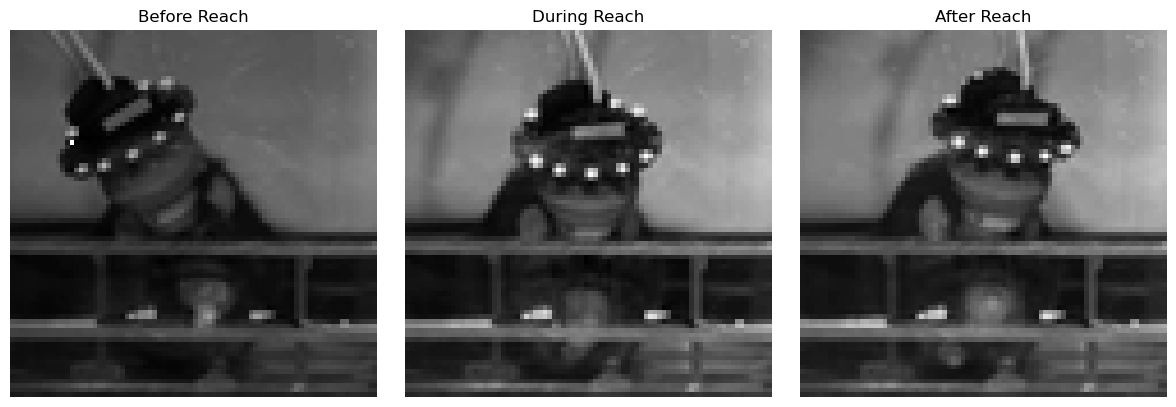

In [23]:

# Assuming all_frames contains images corresponding to before, during, and after reach
num_images = 3  # Number of images to display
timing_labels = ['Before Reach', 'During Reach', 'After Reach']  # Labels for timing context

# Create a figure and subplots to display images side by side
fig, axes = plt.subplots(1, num_images, figsize=(12, 4))  # Adjust figsize as needed

# Loop through the images and display them in separate subplots with timing labels
for i in range(num_images):
    axes[i].imshow(all_frames[i], cmap='gray', interpolation='nearest')
    axes[i].set_title(timing_labels[i])  # Set timing label as subplot title
    axes[i].axis('off')  # Turn off axis labels (optional)

plt.tight_layout()  # Adjust layout for better visualization
plt.show()


In [21]:
all_labels.shape

(390,)

In [24]:
all_frames.shape

(390, 80, 80)

- 'all_labels' has a shape of (390,) indicating 390 instances where each label corresponds to an image frame.
- 'all_frames' has a shape of (390, 80, 80), where:
  - The first dimension aligns with 'all_labels', ensuring a one-to-one relationship between labels and frames.
  - Each frame has dimensions 80x80 pixels, forming the visual data associated with each label.

This aligned structure allows convenient pairing of labels and frames for analyses or models where timing context 
(before reach, during reach, after reach) represented by the labels can be associated with the respective images.
mages.

In [25]:
# Define the discriminator model architecture capable of classifying images
def define_discriminator(in_shape=(80, 80, 1), n_classes=3):
    """
    Discriminator model:
    - Inputs: Image and corresponding label.
    - Outputs: Binary classification (real or fake) of the input image-label pair.

    Arguments:
    - in_shape: Tuple specifying input image shape (height, width, channels).
    - n_classes: Number of classes/categories for label embedding.

    Architecture:
    - Embeds categorical input label into image-sized representation.
    - Concatenates label representation as an additional channel to the input image.
    - Utilizes Convolutional Neural Network (CNN) layers for feature extraction.
    - Employs Leaky ReLU activation for feature map enhancement.
    - Uses Dropout to prevent overfitting.
    - Produces a binary classification output (real/fake) using a sigmoid activation.

    Parameters:
    - in_label: Input layer for the label.
    - in_image: Input layer for the image.
    - li: Embedding layer to represent the input label categorically.
    - merge: Concatenation of image and label embeddings as an input for the CNN layers.
    - fe: Feature maps extracted by CNN layers.
    - out_layer: Output layer predicting the authenticity of the image-label pair.

    Compilation:
    - Utilizes binary cross-entropy loss and Adam optimizer for training.
    - Learning rate set to 0.0002 and beta_1 to 0.5 for Adam optimizer.

    Returns:
    - Discriminator model compiled and ready for training.
    """

    # Define label input
    in_label = Input(shape=(1,))
    # Embed categorical input label
    li = Embedding(n_classes, 50)(in_label)
    # Scale up to image dimensions with linear activation
    n_nodes = in_shape[0] * in_shape[1]
    li = Dense(n_nodes)(li)
    # Reshape to an additional channel
    li = Reshape((in_shape[0], in_shape[1], 1))(li)
    # Define image input
    in_image = Input(shape=in_shape)
    # Concatenate label as a channel to the image
    merge = Concatenate()([in_image, li])
    # Downsample using convolutional layers with LeakyReLU activation
    fe = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(merge)
    fe = LeakyReLU(alpha=0.2)(fe)
    fe = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(fe)
    fe = LeakyReLU(alpha=0.2)(fe)
    fe = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(fe)
    fe = LeakyReLU(alpha=0.2)(fe)
    fe = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(fe)
    fe = LeakyReLU(alpha=0.2)(fe)
    # Flatten feature maps
    fe = Flatten()(fe)
    # Apply dropout to prevent overfitting
    fe = Dropout(0.4)(fe)
    # Output layer for binary classification (real/fake)
    out_layer = Dense(1, activation='sigmoid')(fe)
    # Define the discriminator model
    model = Model([in_image, in_label], out_layer)
    # Compile the model with binary cross-entropy loss and Adam optimizer
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model


In [26]:
# Define the generator model responsible for generating images from random noise and labels
def define_generator(latent_dim, n_classes=3):
    """
    Generator model:
    - Inputs: Random noise and corresponding label.
    - Outputs: Synthetic image corresponding to the input noise-label pair.

    Arguments:
    - latent_dim: Dimension of the input random noise vector.
    - n_classes: Number of classes/categories for label embedding.

    Architecture:
    - Embeds categorical input label into an image-sized representation.
    - Combines random noise with dense layers to form an initial image foundation.
    - Uses Convolutional Neural Network (CNN) layers for upsampling and image generation.
    - Employs Leaky ReLU activation for feature map enhancement.
    - Produces a synthetic image output using the tanh activation function.

    Parameters:
    - in_label: Input layer for the label.
    - in_lat: Input layer for the random noise vector.
    - li: Embedding layer to represent the input label categorically.
    - gen: Initial image foundation derived from random noise.
    - merge: Concatenation of label representation and image foundation as an input for CNN layers.

    Upsampling:
    - Utilizes Conv2DTranspose layers to upsample the image progressively to the desired dimensions (80x80).

    Output:
    - Synthetic image output of the desired dimensions and characteristics.

    Returns:
    - Generator model ready for generating synthetic images based on noise and labels.
    """

    # Define label input
    in_label = Input(shape=(1,))
    # Embed categorical input label
    li = Embedding(n_classes, 50)(in_label)
    # Linear multiplication for reshaping
    n_nodes = 5 * 5
    li = Dense(n_nodes)(li)
    # Reshape label representation to an additional channel
    li = Reshape((5, 5, 1))(li)
    # Define input layer for random noise
    in_lat = Input(shape=(latent_dim,))
    # Foundation for a 5x5 image from random noise
    n_nodes = 128 * 5 * 5
    gen = Dense(n_nodes)(in_lat)
    gen = LeakyReLU(alpha=0.2)(gen)
    gen = Reshape((5, 5, 128))(gen)
    # Merge label representation with the generated image foundation
    merge = Concatenate()([gen, li])
    # Upsample progressively to reach 80x80 image dimensions
    gen = Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same')(merge)
    gen = LeakyReLU(alpha=0.2)(gen)
    gen = Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same')(gen)
    gen = LeakyReLU(alpha=0.2)(gen)
    gen = Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same')(gen)
    gen = LeakyReLU(alpha=0.2)(gen)
    gen = Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same')(gen)
    gen = LeakyReLU(alpha=0.2)(gen)
    # Output layer for generating synthetic images
    out_layer = Conv2D(1, (5, 5), activation='tanh', padding='same')(gen)
    # Define the generator model
    model = Model([in_lat, in_label], out_layer)
    return model


In [27]:
# Define the combined Generator and Discriminator model used for training the Generator
def define_gan(g_model, d_model):
    """
    GAN (Generative Adversarial Network) model:
    - Combines the Generator and Discriminator models for updating the Generator.

    Arguments:
    - g_model: Generator model used for generating synthetic images.
    - d_model: Discriminator model used for classifying real and synthetic images.

    Architecture:
    - Freezes the weights of the Discriminator to avoid updating during GAN training.
    - Utilizes Generator inputs (noise and label) to generate synthetic images.
    - Connects the Generator output and label input to the Discriminator for classification.
    - Generates a GAN output representing the Discriminator's classification of the generated images.
    
    Parameters:
    - gen_noise: Input layer for random noise in the Generator.
    - gen_label: Input layer for labels in the Generator.
    - gen_output: Output of the Generator model, representing synthetic images.
    - gan_output: Output representing the Discriminator's classification of synthetic images.
    
    Compilation:
    - Compiles the GAN model using binary cross-entropy loss and Adam optimizer.

    Returns:
    - GAN model ready for training the Generator by adversarial learning.
    """

    # Make Discriminator weights non-trainable to prevent updates during GAN training
    d_model.trainable = False
    # Get noise and label inputs from the Generator model
    gen_noise, gen_label = g_model.input
    # Get image output from the Generator model
    gen_output = g_model.output
    # Connect Generator output and label input to the Discriminator for classification
    gan_output = d_model([gen_output, gen_label])
    # Define GAN model to take noise and label inputs and output a classification
    model = Model([gen_noise, gen_label], gan_output)
    # Compile the GAN model using binary cross-entropy loss and Adam optimizer
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model


In [28]:
def load_real_samples():
    # Load dataset (all_frames: image frames, all_labels: corresponding labels)
    (trainX, trainy) = all_frames, all_labels

    # Expand image dimensions to include the channel dimension
    X = expand_dims(trainX, axis=-1)

    # Convert image data type from integers to floats for normalization
    X = X.astype('float32')

    # Normalize pixel values from [0, 255] to [-1, 1]
    X = (X - 127.5) / 127.5

    # Return preprocessed image data and corresponding labels
    return [X, trainy]


In [29]:
def generate_real_samples(dataset, n_samples):
    # Split dataset into images and labels
    images, labels = dataset

    # Choose random instances from the dataset
    ix = randint(0, images.shape[0], n_samples)

    # Select images and their corresponding labels based on the random instances
    X, labels = images[ix], labels[ix]

    # Generate class labels indicating the samples are real
    y = ones((n_samples, 1))

    # Return selected real image samples with labels and class labels
    return [X, labels], y


In [31]:

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=3):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    z_input = x_input.reshape(n_samples, latent_dim)
    # Define timing context choices (before reach, during reach, after reach)
    choices = [410,510,610]
    # Generate random labels representing timing contexts for each sample
    labels = np.random.choice(choices, size = n_samples)
    # Return generated latent points and corresponding random labels
    return [z_input, labels]

In [32]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	z_input, labels_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	images = generator.predict([z_input, labels_input])
	# Generate class labels indicating the samples are fake
	y = zeros((n_samples, 1))
    
	return [images, labels_input], y


In [78]:

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=1000, n_batch=128):
	bat_per_epo = int(dataset[0].shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			[X_real, labels_real], y_real = generate_real_samples(dataset,half_batch)
			# update discriminator model weights
			d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real)
			# generate 'fake' examples
			[X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# update discriminator model weights
			d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake)
			# prepare points in latent space as input for the generator
			[z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
            
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
	# save the generator model
	g_model.save('NeuroVidGenModel.h5')


In [79]:

# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

2/2 [==============================] - 1s 600ms/step
>1, 1/3, d1=0.703, d2=0.695 g=0.692
2/2 [==============================] - 0s 424ms/step
>1, 2/3, d1=0.630, d2=0.695 g=0.692
2/2 [==============================] - 0s 428ms/step
>1, 3/3, d1=0.553, d2=0.698 g=0.690
2/2 [==============================] - 0s 429ms/step
>2, 1/3, d1=0.454, d2=0.706 g=0.682
2/2 [==============================] - 0s 429ms/step
>2, 2/3, d1=0.335, d2=0.729 g=0.660
2/2 [==============================] - 0s 428ms/step
>2, 3/3, d1=0.207, d2=0.787 g=0.611
2/2 [==============================] - 0s 438ms/step
>3, 1/3, d1=0.123, d2=0.921 g=0.537
2/2 [==============================] - 0s 428ms/step
>3, 2/3, d1=0.100, d2=1.119 g=0.468
2/2 [==============================] - 0s 428ms/step
>3, 3/3, d1=0.138, d2=1.277 g=0.453
2/2 [==============================] - 0s 429ms/step
>4, 1/3, d1=0.228, d2=1.250 g=0.494
2/2 [==============================] - 0s 429ms/step
>4, 2/3, d1=0.362, d2=1.071 g=0.564
2/2 [================

2/2 [==============================] - 1s 511ms/step
>31, 2/3, d1=0.427, d2=0.445 g=1.302
2/2 [==============================] - 1s 529ms/step
>31, 3/3, d1=0.470, d2=0.460 g=1.215
2/2 [==============================] - 0s 411ms/step
>32, 1/3, d1=0.425, d2=0.493 g=1.240
2/2 [==============================] - 1s 517ms/step
>32, 2/3, d1=0.430, d2=0.508 g=1.290
2/2 [==============================] - 0s 411ms/step
>32, 3/3, d1=0.444, d2=0.491 g=1.240
2/2 [==============================] - 0s 416ms/step
>33, 1/3, d1=0.458, d2=0.491 g=1.183
2/2 [==============================] - 0s 421ms/step
>33, 2/3, d1=0.477, d2=0.615 g=1.189
2/2 [==============================] - 0s 473ms/step
>33, 3/3, d1=0.446, d2=0.546 g=1.260
2/2 [==============================] - 0s 419ms/step
>34, 1/3, d1=0.486, d2=0.597 g=1.253
2/2 [==============================] - 0s 431ms/step
>34, 2/3, d1=0.536, d2=0.579 g=1.342
2/2 [==============================] - 0s 429ms/step
>34, 3/3, d1=0.578, d2=0.569 g=1.241
2/2 [=====

2/2 [==============================] - 1s 530ms/step
>61, 3/3, d1=0.735, d2=0.722 g=0.847
2/2 [==============================] - 1s 540ms/step
>62, 1/3, d1=0.701, d2=0.688 g=0.863
2/2 [==============================] - 1s 490ms/step
>62, 2/3, d1=0.681, d2=0.680 g=0.898
2/2 [==============================] - 1s 521ms/step
>62, 3/3, d1=0.685, d2=0.673 g=0.894
2/2 [==============================] - 1s 493ms/step
>63, 1/3, d1=0.671, d2=0.681 g=0.883
2/2 [==============================] - 1s 503ms/step
>63, 2/3, d1=0.651, d2=0.678 g=0.887
2/2 [==============================] - 1s 490ms/step
>63, 3/3, d1=0.688, d2=0.680 g=0.868
2/2 [==============================] - 1s 504ms/step
>64, 1/3, d1=0.647, d2=0.686 g=0.861
2/2 [==============================] - 1s 538ms/step
>64, 2/3, d1=0.687, d2=0.662 g=0.864
2/2 [==============================] - 1s 538ms/step
>64, 3/3, d1=0.665, d2=0.662 g=0.862
2/2 [==============================] - 1s 535ms/step
>65, 1/3, d1=0.666, d2=0.671 g=0.875
2/2 [=====

2/2 [==============================] - 1s 732ms/step
>92, 1/3, d1=0.620, d2=0.623 g=0.893
2/2 [==============================] - 1s 800ms/step
>92, 2/3, d1=0.656, d2=0.630 g=0.877
2/2 [==============================] - 1s 775ms/step
>92, 3/3, d1=0.661, d2=0.625 g=0.890
2/2 [==============================] - 1s 829ms/step
>93, 1/3, d1=0.645, d2=0.646 g=0.896
2/2 [==============================] - 1s 780ms/step
>93, 2/3, d1=0.642, d2=0.645 g=0.938
2/2 [==============================] - 1s 764ms/step
>93, 3/3, d1=0.653, d2=0.590 g=0.954
2/2 [==============================] - 1s 817ms/step
>94, 1/3, d1=0.655, d2=0.640 g=0.988
2/2 [==============================] - 1s 780ms/step
>94, 2/3, d1=0.656, d2=0.609 g=0.944
2/2 [==============================] - 1s 811ms/step
>94, 3/3, d1=0.652, d2=0.649 g=0.901
2/2 [==============================] - 1s 797ms/step
>95, 1/3, d1=0.648, d2=0.696 g=0.881
2/2 [==============================] - 1s 793ms/step
>95, 2/3, d1=0.647, d2=0.712 g=0.845
2/2 [=====

2/2 [==============================] - 1s 756ms/step
>122, 1/3, d1=0.676, d2=0.676 g=0.788
2/2 [==============================] - 1s 813ms/step
>122, 2/3, d1=0.671, d2=0.687 g=0.868
2/2 [==============================] - 1s 782ms/step
>122, 3/3, d1=0.705, d2=0.687 g=0.787
2/2 [==============================] - 1s 802ms/step
>123, 1/3, d1=0.661, d2=0.699 g=0.802
2/2 [==============================] - 1s 778ms/step
>123, 2/3, d1=0.660, d2=0.715 g=0.809
2/2 [==============================] - 1s 749ms/step
>123, 3/3, d1=0.679, d2=0.686 g=0.825
2/2 [==============================] - 1s 880ms/step
>124, 1/3, d1=0.661, d2=0.674 g=0.847
2/2 [==============================] - 1s 778ms/step
>124, 2/3, d1=0.699, d2=0.693 g=0.804
2/2 [==============================] - 1s 798ms/step
>124, 3/3, d1=0.680, d2=0.668 g=0.872
2/2 [==============================] - 1s 775ms/step
>125, 1/3, d1=0.677, d2=0.643 g=0.851
2/2 [==============================] - 1s 799ms/step
>125, 2/3, d1=0.676, d2=0.630 g=0.864

2/2 [==============================] - 1s 789ms/step
>152, 1/3, d1=0.605, d2=0.677 g=0.793
2/2 [==============================] - 1s 811ms/step
>152, 2/3, d1=0.588, d2=0.609 g=1.042
2/2 [==============================] - 1s 780ms/step
>152, 3/3, d1=0.603, d2=0.682 g=0.811
2/2 [==============================] - 1s 786ms/step
>153, 1/3, d1=0.610, d2=0.618 g=0.931
2/2 [==============================] - 1s 780ms/step
>153, 2/3, d1=0.569, d2=0.620 g=0.940
2/2 [==============================] - 1s 757ms/step
>153, 3/3, d1=0.640, d2=0.693 g=0.810
2/2 [==============================] - 1s 823ms/step
>154, 1/3, d1=0.557, d2=0.639 g=1.017
2/2 [==============================] - 1s 773ms/step
>154, 2/3, d1=0.651, d2=0.675 g=0.805
2/2 [==============================] - 1s 793ms/step
>154, 3/3, d1=0.563, d2=0.641 g=0.890
2/2 [==============================] - 1s 732ms/step
>155, 1/3, d1=0.603, d2=0.715 g=0.769
2/2 [==============================] - 1s 798ms/step
>155, 2/3, d1=0.592, d2=0.657 g=0.994

2/2 [==============================] - 1s 602ms/step
>182, 1/3, d1=0.656, d2=0.628 g=0.936
2/2 [==============================] - 1s 616ms/step
>182, 2/3, d1=0.614, d2=0.656 g=0.932
2/2 [==============================] - 1s 613ms/step
>182, 3/3, d1=0.617, d2=0.694 g=0.930
2/2 [==============================] - 1s 618ms/step
>183, 1/3, d1=0.602, d2=0.664 g=0.992
2/2 [==============================] - 1s 602ms/step
>183, 2/3, d1=0.670, d2=0.628 g=0.874
2/2 [==============================] - 1s 615ms/step
>183, 3/3, d1=0.614, d2=0.680 g=0.908
2/2 [==============================] - 1s 618ms/step
>184, 1/3, d1=0.608, d2=0.705 g=0.868
2/2 [==============================] - 1s 616ms/step
>184, 2/3, d1=0.608, d2=0.693 g=0.932
2/2 [==============================] - 1s 621ms/step
>184, 3/3, d1=0.673, d2=0.714 g=0.803
2/2 [==============================] - 1s 618ms/step
>185, 1/3, d1=0.577, d2=0.716 g=0.842
2/2 [==============================] - 1s 617ms/step
>185, 2/3, d1=0.652, d2=0.717 g=0.833

2/2 [==============================] - 1s 578ms/step
>212, 1/3, d1=0.618, d2=0.622 g=0.931
2/2 [==============================] - 1s 589ms/step
>212, 2/3, d1=0.648, d2=0.681 g=0.803
2/2 [==============================] - 1s 578ms/step
>212, 3/3, d1=0.623, d2=0.674 g=0.932
2/2 [==============================] - 1s 578ms/step
>213, 1/3, d1=0.628, d2=0.657 g=0.931
2/2 [==============================] - 1s 609ms/step
>213, 2/3, d1=0.674, d2=0.624 g=0.921
2/2 [==============================] - 1s 594ms/step
>213, 3/3, d1=0.608, d2=0.606 g=0.938
2/2 [==============================] - 1s 594ms/step
>214, 1/3, d1=0.649, d2=0.683 g=0.855
2/2 [==============================] - 1s 578ms/step
>214, 2/3, d1=0.634, d2=0.614 g=1.080
2/2 [==============================] - 1s 594ms/step
>214, 3/3, d1=0.637, d2=0.612 g=0.883
2/2 [==============================] - 1s 578ms/step
>215, 1/3, d1=0.593, d2=0.556 g=1.011
2/2 [==============================] - 1s 578ms/step
>215, 2/3, d1=0.627, d2=0.593 g=0.922

2/2 [==============================] - 1s 578ms/step
>242, 1/3, d1=0.641, d2=0.677 g=0.805
2/2 [==============================] - 1s 578ms/step
>242, 2/3, d1=0.564, d2=0.667 g=0.887
2/2 [==============================] - 1s 578ms/step
>242, 3/3, d1=0.591, d2=0.721 g=0.804
2/2 [==============================] - 1s 578ms/step
>243, 1/3, d1=0.597, d2=0.669 g=1.034
2/2 [==============================] - 1s 594ms/step
>243, 2/3, d1=0.616, d2=0.665 g=0.854
2/2 [==============================] - 1s 578ms/step
>243, 3/3, d1=0.640, d2=0.656 g=0.951
2/2 [==============================] - 1s 578ms/step
>244, 1/3, d1=0.619, d2=0.642 g=0.881
2/2 [==============================] - 1s 594ms/step
>244, 2/3, d1=0.657, d2=0.662 g=0.887
2/2 [==============================] - 1s 594ms/step
>244, 3/3, d1=0.607, d2=0.651 g=0.985
2/2 [==============================] - 1s 594ms/step
>245, 1/3, d1=0.665, d2=0.633 g=0.914
2/2 [==============================] - 1s 578ms/step
>245, 2/3, d1=0.583, d2=0.609 g=0.940

2/2 [==============================] - 1s 594ms/step
>272, 1/3, d1=0.538, d2=0.590 g=1.468
2/2 [==============================] - 1s 578ms/step
>272, 2/3, d1=0.681, d2=0.690 g=0.852
2/2 [==============================] - 1s 601ms/step
>272, 3/3, d1=0.575, d2=0.608 g=1.062
2/2 [==============================] - 1s 594ms/step
>273, 1/3, d1=0.591, d2=0.716 g=0.903
2/2 [==============================] - 1s 594ms/step
>273, 2/3, d1=0.626, d2=0.644 g=1.087
2/2 [==============================] - 1s 578ms/step
>273, 3/3, d1=0.595, d2=0.557 g=1.200
2/2 [==============================] - 1s 594ms/step
>274, 1/3, d1=0.716, d2=0.549 g=1.157
2/2 [==============================] - 1s 594ms/step
>274, 2/3, d1=0.581, d2=0.507 g=1.128
2/2 [==============================] - 1s 578ms/step
>274, 3/3, d1=0.604, d2=0.695 g=0.812
2/2 [==============================] - 1s 594ms/step
>275, 1/3, d1=0.582, d2=0.637 g=1.214
2/2 [==============================] - 1s 578ms/step
>275, 2/3, d1=0.555, d2=0.630 g=1.085

2/2 [==============================] - 1s 578ms/step
>302, 1/3, d1=0.576, d2=0.589 g=1.082
2/2 [==============================] - 1s 578ms/step
>302, 2/3, d1=0.579, d2=0.574 g=1.026
2/2 [==============================] - 1s 578ms/step
>302, 3/3, d1=0.601, d2=0.594 g=1.017
2/2 [==============================] - 1s 578ms/step
>303, 1/3, d1=0.573, d2=0.626 g=1.011
2/2 [==============================] - 1s 578ms/step
>303, 2/3, d1=0.604, d2=0.603 g=1.008
2/2 [==============================] - 1s 578ms/step
>303, 3/3, d1=0.590, d2=0.602 g=1.012
2/2 [==============================] - 1s 594ms/step
>304, 1/3, d1=0.552, d2=0.619 g=1.016
2/2 [==============================] - 1s 578ms/step
>304, 2/3, d1=0.626, d2=0.587 g=1.257
2/2 [==============================] - 1s 594ms/step
>304, 3/3, d1=0.644, d2=0.575 g=1.118
2/2 [==============================] - 1s 578ms/step
>305, 1/3, d1=0.581, d2=0.613 g=0.976
2/2 [==============================] - 1s 594ms/step
>305, 2/3, d1=0.569, d2=0.603 g=1.125

2/2 [==============================] - 1s 578ms/step
>332, 1/3, d1=0.583, d2=0.575 g=1.073
2/2 [==============================] - 1s 594ms/step
>332, 2/3, d1=0.582, d2=0.567 g=1.246
2/2 [==============================] - 1s 594ms/step
>332, 3/3, d1=0.508, d2=0.547 g=1.245
2/2 [==============================] - 1s 578ms/step
>333, 1/3, d1=0.557, d2=0.483 g=1.390
2/2 [==============================] - 1s 578ms/step
>333, 2/3, d1=0.587, d2=0.585 g=1.064
2/2 [==============================] - 1s 597ms/step
>333, 3/3, d1=0.535, d2=0.594 g=1.209
2/2 [==============================] - 1s 578ms/step
>334, 1/3, d1=0.503, d2=0.582 g=1.145
2/2 [==============================] - 1s 594ms/step
>334, 2/3, d1=0.575, d2=0.537 g=1.433
2/2 [==============================] - 1s 594ms/step
>334, 3/3, d1=0.600, d2=0.699 g=0.943
2/2 [==============================] - 1s 578ms/step
>335, 1/3, d1=0.541, d2=0.630 g=1.626
2/2 [==============================] - 1s 594ms/step
>335, 2/3, d1=0.648, d2=0.600 g=1.117

2/2 [==============================] - 1s 578ms/step
>362, 1/3, d1=0.647, d2=0.669 g=0.991
2/2 [==============================] - 1s 578ms/step
>362, 2/3, d1=0.585, d2=0.608 g=1.079
2/2 [==============================] - 1s 594ms/step
>362, 3/3, d1=0.576, d2=0.646 g=0.985
2/2 [==============================] - 1s 594ms/step
>363, 1/3, d1=0.561, d2=0.540 g=1.244
2/2 [==============================] - 1s 594ms/step
>363, 2/3, d1=0.696, d2=0.606 g=1.159
2/2 [==============================] - 1s 594ms/step
>363, 3/3, d1=0.558, d2=0.616 g=0.950
2/2 [==============================] - 1s 578ms/step
>364, 1/3, d1=0.520, d2=0.642 g=1.212
2/2 [==============================] - 1s 578ms/step
>364, 2/3, d1=0.562, d2=0.612 g=1.181
2/2 [==============================] - 1s 578ms/step
>364, 3/3, d1=0.672, d2=0.459 g=1.497
2/2 [==============================] - 1s 594ms/step
>365, 1/3, d1=0.662, d2=0.640 g=1.015
2/2 [==============================] - 1s 578ms/step
>365, 2/3, d1=0.559, d2=0.576 g=1.402

2/2 [==============================] - 1s 578ms/step
>392, 1/3, d1=0.646, d2=0.662 g=0.961
2/2 [==============================] - 1s 578ms/step
>392, 2/3, d1=0.549, d2=0.542 g=1.393
2/2 [==============================] - 1s 594ms/step
>392, 3/3, d1=0.589, d2=0.576 g=1.124
2/2 [==============================] - 1s 594ms/step
>393, 1/3, d1=0.589, d2=0.600 g=1.078
2/2 [==============================] - 1s 594ms/step
>393, 2/3, d1=0.564, d2=0.614 g=1.097
2/2 [==============================] - 1s 594ms/step
>393, 3/3, d1=0.563, d2=0.585 g=1.169
2/2 [==============================] - 1s 594ms/step
>394, 1/3, d1=0.657, d2=0.541 g=1.338
2/2 [==============================] - 1s 578ms/step
>394, 2/3, d1=0.574, d2=0.610 g=1.056
2/2 [==============================] - 1s 594ms/step
>394, 3/3, d1=0.617, d2=0.630 g=1.356
2/2 [==============================] - 1s 599ms/step
>395, 1/3, d1=0.543, d2=0.544 g=1.265
2/2 [==============================] - 1s 578ms/step
>395, 2/3, d1=0.673, d2=0.525 g=1.517

2/2 [==============================] - 1s 594ms/step
>422, 1/3, d1=0.621, d2=0.547 g=1.199
2/2 [==============================] - 1s 594ms/step
>422, 2/3, d1=0.567, d2=0.657 g=1.050
2/2 [==============================] - 1s 594ms/step
>422, 3/3, d1=0.584, d2=0.588 g=1.294
2/2 [==============================] - 1s 578ms/step
>423, 1/3, d1=0.605, d2=0.690 g=0.981
2/2 [==============================] - 1s 578ms/step
>423, 2/3, d1=0.566, d2=0.584 g=1.142
2/2 [==============================] - 1s 594ms/step
>423, 3/3, d1=0.572, d2=0.626 g=1.028
2/2 [==============================] - 1s 594ms/step
>424, 1/3, d1=0.547, d2=0.580 g=1.163
2/2 [==============================] - 1s 594ms/step
>424, 2/3, d1=0.692, d2=0.587 g=1.121
2/2 [==============================] - 1s 594ms/step
>424, 3/3, d1=0.569, d2=0.649 g=0.922
2/2 [==============================] - 1s 578ms/step
>425, 1/3, d1=0.554, d2=0.610 g=1.204
2/2 [==============================] - 1s 594ms/step
>425, 2/3, d1=0.611, d2=0.598 g=1.101

2/2 [==============================] - 1s 578ms/step
>452, 1/3, d1=0.536, d2=0.546 g=1.155
2/2 [==============================] - 1s 594ms/step
>452, 2/3, d1=0.509, d2=0.560 g=1.109
2/2 [==============================] - 1s 578ms/step
>452, 3/3, d1=0.590, d2=0.553 g=1.356
2/2 [==============================] - 1s 578ms/step
>453, 1/3, d1=0.592, d2=0.556 g=1.174
2/2 [==============================] - 1s 594ms/step
>453, 2/3, d1=0.615, d2=0.530 g=1.162
2/2 [==============================] - 1s 594ms/step
>453, 3/3, d1=0.528, d2=0.552 g=1.134
2/2 [==============================] - 1s 578ms/step
>454, 1/3, d1=0.461, d2=0.509 g=1.198
2/2 [==============================] - 1s 578ms/step
>454, 2/3, d1=0.511, d2=0.506 g=1.305
2/2 [==============================] - 1s 594ms/step
>454, 3/3, d1=0.601, d2=0.575 g=1.041
2/2 [==============================] - 1s 589ms/step
>455, 1/3, d1=0.519, d2=0.603 g=1.190
2/2 [==============================] - 1s 594ms/step
>455, 2/3, d1=0.504, d2=0.563 g=1.122

2/2 [==============================] - 1s 602ms/step
>482, 1/3, d1=0.569, d2=0.583 g=1.050
2/2 [==============================] - 1s 594ms/step
>482, 2/3, d1=0.581, d2=0.508 g=1.248
2/2 [==============================] - 1s 578ms/step
>482, 3/3, d1=0.610, d2=0.560 g=1.127
2/2 [==============================] - 1s 578ms/step
>483, 1/3, d1=0.520, d2=0.578 g=1.080
2/2 [==============================] - 1s 578ms/step
>483, 2/3, d1=0.544, d2=0.523 g=1.241
2/2 [==============================] - 1s 578ms/step
>483, 3/3, d1=0.535, d2=0.527 g=1.074
2/2 [==============================] - 1s 594ms/step
>484, 1/3, d1=0.567, d2=0.576 g=1.169
2/2 [==============================] - 1s 594ms/step
>484, 2/3, d1=0.567, d2=0.592 g=0.983
2/2 [==============================] - 1s 578ms/step
>484, 3/3, d1=0.514, d2=0.523 g=1.364
2/2 [==============================] - 1s 594ms/step
>485, 1/3, d1=0.602, d2=0.589 g=1.150
2/2 [==============================] - 1s 594ms/step
>485, 2/3, d1=0.571, d2=0.644 g=1.033

2/2 [==============================] - 1s 594ms/step
>512, 1/3, d1=0.540, d2=0.585 g=1.435
2/2 [==============================] - 1s 578ms/step
>512, 2/3, d1=0.584, d2=0.590 g=1.143
2/2 [==============================] - 1s 578ms/step
>512, 3/3, d1=0.562, d2=0.584 g=1.257
2/2 [==============================] - 1s 594ms/step
>513, 1/3, d1=0.557, d2=0.654 g=0.995
2/2 [==============================] - 1s 578ms/step
>513, 2/3, d1=0.574, d2=0.527 g=1.511
2/2 [==============================] - 1s 578ms/step
>513, 3/3, d1=0.611, d2=0.610 g=1.073
2/2 [==============================] - 1s 594ms/step
>514, 1/3, d1=0.516, d2=0.493 g=1.321
2/2 [==============================] - 1s 578ms/step
>514, 2/3, d1=0.522, d2=0.569 g=1.158
2/2 [==============================] - 1s 578ms/step
>514, 3/3, d1=0.579, d2=0.496 g=1.452
2/2 [==============================] - 1s 578ms/step
>515, 1/3, d1=0.522, d2=0.505 g=1.260
2/2 [==============================] - 1s 594ms/step
>515, 2/3, d1=0.518, d2=0.526 g=1.367

2/2 [==============================] - 1s 594ms/step
>542, 1/3, d1=0.524, d2=0.635 g=1.390
2/2 [==============================] - 1s 597ms/step
>542, 2/3, d1=0.519, d2=0.488 g=1.343
2/2 [==============================] - 1s 578ms/step
>542, 3/3, d1=0.560, d2=0.498 g=1.390
2/2 [==============================] - 1s 578ms/step
>543, 1/3, d1=0.502, d2=0.579 g=1.224
2/2 [==============================] - 1s 578ms/step
>543, 2/3, d1=0.600, d2=0.549 g=1.465
2/2 [==============================] - 1s 594ms/step
>543, 3/3, d1=0.523, d2=0.568 g=1.228
2/2 [==============================] - 1s 594ms/step
>544, 1/3, d1=0.563, d2=0.539 g=1.410
2/2 [==============================] - 1s 594ms/step
>544, 2/3, d1=0.592, d2=0.560 g=1.146
2/2 [==============================] - 1s 578ms/step
>544, 3/3, d1=0.550, d2=0.543 g=1.311
2/2 [==============================] - 1s 594ms/step
>545, 1/3, d1=0.484, d2=0.566 g=1.289
2/2 [==============================] - 1s 578ms/step
>545, 2/3, d1=0.568, d2=0.444 g=1.495

2/2 [==============================] - 1s 578ms/step
>572, 1/3, d1=0.464, d2=0.481 g=1.377
2/2 [==============================] - 1s 594ms/step
>572, 2/3, d1=0.505, d2=0.490 g=1.392
2/2 [==============================] - 1s 578ms/step
>572, 3/3, d1=0.515, d2=0.532 g=1.246
2/2 [==============================] - 1s 594ms/step
>573, 1/3, d1=0.534, d2=0.594 g=1.352
2/2 [==============================] - 1s 578ms/step
>573, 2/3, d1=0.553, d2=0.554 g=1.145
2/2 [==============================] - 1s 594ms/step
>573, 3/3, d1=0.514, d2=0.569 g=1.338
2/2 [==============================] - 1s 594ms/step
>574, 1/3, d1=0.502, d2=0.583 g=1.287
2/2 [==============================] - 1s 594ms/step
>574, 2/3, d1=0.534, d2=0.465 g=1.488
2/2 [==============================] - 1s 578ms/step
>574, 3/3, d1=0.584, d2=0.525 g=1.210
2/2 [==============================] - 1s 578ms/step
>575, 1/3, d1=0.494, d2=0.530 g=1.293
2/2 [==============================] - 1s 594ms/step
>575, 2/3, d1=0.481, d2=0.565 g=1.272

2/2 [==============================] - 1s 594ms/step
>602, 1/3, d1=0.508, d2=0.510 g=1.318
2/2 [==============================] - 1s 578ms/step
>602, 2/3, d1=0.447, d2=0.497 g=1.386
2/2 [==============================] - 1s 601ms/step
>602, 3/3, d1=0.527, d2=0.529 g=1.426
2/2 [==============================] - 1s 578ms/step
>603, 1/3, d1=0.505, d2=0.531 g=1.362
2/2 [==============================] - 1s 594ms/step
>603, 2/3, d1=0.509, d2=0.497 g=1.365
2/2 [==============================] - 1s 578ms/step
>603, 3/3, d1=0.524, d2=0.579 g=1.282
2/2 [==============================] - 1s 594ms/step
>604, 1/3, d1=0.485, d2=0.551 g=1.290
2/2 [==============================] - 1s 594ms/step
>604, 2/3, d1=0.526, d2=0.532 g=1.417
2/2 [==============================] - 1s 578ms/step
>604, 3/3, d1=0.526, d2=0.513 g=1.410
2/2 [==============================] - 1s 594ms/step
>605, 1/3, d1=0.593, d2=0.565 g=1.325
2/2 [==============================] - 1s 578ms/step
>605, 2/3, d1=0.565, d2=0.542 g=1.417

2/2 [==============================] - 1s 578ms/step
>632, 1/3, d1=0.511, d2=0.623 g=1.345
2/2 [==============================] - 1s 578ms/step
>632, 2/3, d1=0.553, d2=0.533 g=1.487
2/2 [==============================] - 1s 594ms/step
>632, 3/3, d1=0.515, d2=0.467 g=1.413
2/2 [==============================] - 1s 594ms/step
>633, 1/3, d1=0.514, d2=0.464 g=1.382
2/2 [==============================] - 1s 594ms/step
>633, 2/3, d1=0.558, d2=0.477 g=1.367
2/2 [==============================] - 1s 578ms/step
>633, 3/3, d1=0.471, d2=0.521 g=1.363
2/2 [==============================] - 1s 578ms/step
>634, 1/3, d1=0.482, d2=0.457 g=1.451
2/2 [==============================] - 1s 578ms/step
>634, 2/3, d1=0.494, d2=0.497 g=1.331
2/2 [==============================] - 1s 578ms/step
>634, 3/3, d1=0.464, d2=0.513 g=1.363
2/2 [==============================] - 1s 578ms/step
>635, 1/3, d1=0.475, d2=0.486 g=1.406
2/2 [==============================] - 1s 578ms/step
>635, 2/3, d1=0.502, d2=0.449 g=1.394

2/2 [==============================] - 1s 594ms/step
>662, 1/3, d1=0.503, d2=0.435 g=1.684
2/2 [==============================] - 1s 578ms/step
>662, 2/3, d1=0.477, d2=0.561 g=1.510
2/2 [==============================] - 1s 578ms/step
>662, 3/3, d1=0.483, d2=0.503 g=1.416
2/2 [==============================] - 1s 593ms/step
>663, 1/3, d1=0.545, d2=0.464 g=1.674
2/2 [==============================] - 1s 578ms/step
>663, 2/3, d1=0.460, d2=0.496 g=1.293
2/2 [==============================] - 1s 594ms/step
>663, 3/3, d1=0.566, d2=0.462 g=1.365
2/2 [==============================] - 1s 594ms/step
>664, 1/3, d1=0.486, d2=0.626 g=1.239
2/2 [==============================] - 1s 594ms/step
>664, 2/3, d1=0.498, d2=0.453 g=1.591
2/2 [==============================] - 1s 578ms/step
>664, 3/3, d1=0.561, d2=0.486 g=1.403
2/2 [==============================] - 1s 578ms/step
>665, 1/3, d1=0.505, d2=0.551 g=1.220
2/2 [==============================] - 1s 578ms/step
>665, 2/3, d1=0.415, d2=0.531 g=1.430

2/2 [==============================] - 1s 594ms/step
>692, 1/3, d1=0.543, d2=0.431 g=1.380
2/2 [==============================] - 1s 578ms/step
>692, 2/3, d1=0.469, d2=0.554 g=1.365
2/2 [==============================] - 1s 594ms/step
>692, 3/3, d1=0.477, d2=0.521 g=1.642
2/2 [==============================] - 1s 594ms/step
>693, 1/3, d1=0.574, d2=0.482 g=1.467
2/2 [==============================] - 1s 578ms/step
>693, 2/3, d1=0.470, d2=0.526 g=1.485
2/2 [==============================] - 1s 578ms/step
>693, 3/3, d1=0.486, d2=0.482 g=1.589
2/2 [==============================] - 1s 594ms/step
>694, 1/3, d1=0.496, d2=0.491 g=1.463
2/2 [==============================] - 1s 578ms/step
>694, 2/3, d1=0.502, d2=0.471 g=1.458
2/2 [==============================] - 1s 594ms/step
>694, 3/3, d1=0.450, d2=0.569 g=1.374
2/2 [==============================] - 1s 578ms/step
>695, 1/3, d1=0.442, d2=0.460 g=1.603
2/2 [==============================] - 1s 594ms/step
>695, 2/3, d1=0.581, d2=0.517 g=1.473

2/2 [==============================] - 1s 578ms/step
>722, 1/3, d1=0.521, d2=0.441 g=1.949
2/2 [==============================] - 1s 578ms/step
>722, 2/3, d1=0.633, d2=0.495 g=1.820
2/2 [==============================] - 1s 578ms/step
>722, 3/3, d1=0.454, d2=0.484 g=1.431
2/2 [==============================] - 1s 594ms/step
>723, 1/3, d1=0.508, d2=0.646 g=1.460
2/2 [==============================] - 1s 583ms/step
>723, 2/3, d1=0.427, d2=0.410 g=2.169
2/2 [==============================] - 1s 578ms/step
>723, 3/3, d1=0.644, d2=0.519 g=1.691
2/2 [==============================] - 1s 578ms/step
>724, 1/3, d1=0.458, d2=0.439 g=1.756
2/2 [==============================] - 1s 578ms/step
>724, 2/3, d1=0.632, d2=0.621 g=1.629
2/2 [==============================] - 1s 578ms/step
>724, 3/3, d1=0.378, d2=0.395 g=2.080
2/2 [==============================] - 1s 594ms/step
>725, 1/3, d1=0.703, d2=0.568 g=1.543
2/2 [==============================] - 1s 594ms/step
>725, 2/3, d1=0.396, d2=0.463 g=1.751

2/2 [==============================] - 1s 594ms/step
>752, 1/3, d1=0.494, d2=0.418 g=1.908
2/2 [==============================] - 1s 578ms/step
>752, 2/3, d1=0.538, d2=0.461 g=1.465
2/2 [==============================] - 1s 578ms/step
>752, 3/3, d1=0.375, d2=0.492 g=1.709
2/2 [==============================] - 1s 578ms/step
>753, 1/3, d1=0.555, d2=0.472 g=1.355
2/2 [==============================] - 1s 578ms/step
>753, 2/3, d1=0.377, d2=0.469 g=1.905
2/2 [==============================] - 1s 594ms/step
>753, 3/3, d1=0.545, d2=0.504 g=1.497
2/2 [==============================] - 1s 578ms/step
>754, 1/3, d1=0.469, d2=0.477 g=1.673
2/2 [==============================] - 1s 578ms/step
>754, 2/3, d1=0.492, d2=0.461 g=1.383
2/2 [==============================] - 1s 594ms/step
>754, 3/3, d1=0.494, d2=0.491 g=1.753
2/2 [==============================] - 1s 578ms/step
>755, 1/3, d1=0.547, d2=0.445 g=1.238
2/2 [==============================] - 1s 594ms/step
>755, 2/3, d1=0.360, d2=0.455 g=1.640

2/2 [==============================] - 1s 578ms/step
>782, 1/3, d1=0.496, d2=0.455 g=1.426
2/2 [==============================] - 1s 594ms/step
>782, 2/3, d1=0.444, d2=0.536 g=1.480
2/2 [==============================] - 1s 594ms/step
>782, 3/3, d1=0.487, d2=0.469 g=1.550
2/2 [==============================] - 1s 594ms/step
>783, 1/3, d1=0.459, d2=0.521 g=1.509
2/2 [==============================] - 1s 594ms/step
>783, 2/3, d1=0.538, d2=0.494 g=1.665
2/2 [==============================] - 1s 583ms/step
>783, 3/3, d1=0.517, d2=0.518 g=1.548
2/2 [==============================] - 1s 578ms/step
>784, 1/3, d1=0.553, d2=0.481 g=1.624
2/2 [==============================] - 1s 578ms/step
>784, 2/3, d1=0.491, d2=0.480 g=1.440
2/2 [==============================] - 1s 578ms/step
>784, 3/3, d1=0.402, d2=0.464 g=1.581
2/2 [==============================] - 1s 594ms/step
>785, 1/3, d1=0.477, d2=0.503 g=1.515
2/2 [==============================] - 1s 578ms/step
>785, 2/3, d1=0.485, d2=0.502 g=1.810

2/2 [==============================] - 1s 594ms/step
>812, 1/3, d1=0.382, d2=0.506 g=1.588
2/2 [==============================] - 1s 594ms/step
>812, 2/3, d1=0.501, d2=0.444 g=1.521
2/2 [==============================] - 1s 594ms/step
>812, 3/3, d1=0.469, d2=0.573 g=1.704
2/2 [==============================] - 1s 578ms/step
>813, 1/3, d1=0.613, d2=0.453 g=1.398
2/2 [==============================] - 1s 578ms/step
>813, 2/3, d1=0.460, d2=0.507 g=1.446
2/2 [==============================] - 1s 578ms/step
>813, 3/3, d1=0.423, d2=0.518 g=1.406
2/2 [==============================] - 1s 594ms/step
>814, 1/3, d1=0.482, d2=0.478 g=1.515
2/2 [==============================] - 1s 578ms/step
>814, 2/3, d1=0.486, d2=0.533 g=1.426
2/2 [==============================] - 1s 578ms/step
>814, 3/3, d1=0.491, d2=0.456 g=1.619
2/2 [==============================] - 1s 578ms/step
>815, 1/3, d1=0.451, d2=0.478 g=1.669
2/2 [==============================] - 1s 594ms/step
>815, 2/3, d1=0.478, d2=0.475 g=1.606

2/2 [==============================] - 1s 578ms/step
>842, 1/3, d1=0.550, d2=0.542 g=1.524
2/2 [==============================] - 1s 578ms/step
>842, 2/3, d1=0.405, d2=0.458 g=1.580
2/2 [==============================] - 1s 578ms/step
>842, 3/3, d1=0.458, d2=0.416 g=1.681
2/2 [==============================] - 1s 578ms/step
>843, 1/3, d1=0.482, d2=0.433 g=1.477
2/2 [==============================] - 1s 578ms/step
>843, 2/3, d1=0.477, d2=0.532 g=1.628
2/2 [==============================] - 1s 578ms/step
>843, 3/3, d1=0.447, d2=0.581 g=1.616
2/2 [==============================] - 1s 584ms/step
>844, 1/3, d1=0.492, d2=0.426 g=1.780
2/2 [==============================] - 1s 578ms/step
>844, 2/3, d1=0.546, d2=0.510 g=1.442
2/2 [==============================] - 1s 594ms/step
>844, 3/3, d1=0.435, d2=0.495 g=1.695
2/2 [==============================] - 1s 578ms/step
>845, 1/3, d1=0.552, d2=0.471 g=1.376
2/2 [==============================] - 1s 594ms/step
>845, 2/3, d1=0.456, d2=0.514 g=1.517

2/2 [==============================] - 1s 578ms/step
>872, 1/3, d1=0.554, d2=0.524 g=1.439
2/2 [==============================] - 1s 578ms/step
>872, 2/3, d1=0.441, d2=0.490 g=1.536
2/2 [==============================] - 1s 594ms/step
>872, 3/3, d1=0.438, d2=0.504 g=1.475
2/2 [==============================] - 1s 578ms/step
>873, 1/3, d1=0.442, d2=0.475 g=1.562
2/2 [==============================] - 1s 578ms/step
>873, 2/3, d1=0.543, d2=0.471 g=1.486
2/2 [==============================] - 1s 594ms/step
>873, 3/3, d1=0.413, d2=0.434 g=1.550
2/2 [==============================] - 1s 578ms/step
>874, 1/3, d1=0.447, d2=0.514 g=1.675
2/2 [==============================] - 1s 594ms/step
>874, 2/3, d1=0.564, d2=0.514 g=1.568
2/2 [==============================] - 1s 578ms/step
>874, 3/3, d1=0.545, d2=0.516 g=1.611
2/2 [==============================] - 1s 594ms/step
>875, 1/3, d1=0.413, d2=0.496 g=1.639
2/2 [==============================] - 1s 594ms/step
>875, 2/3, d1=0.536, d2=0.494 g=1.691

2/2 [==============================] - 1s 578ms/step
>902, 1/3, d1=0.414, d2=0.519 g=1.512
2/2 [==============================] - 1s 578ms/step
>902, 2/3, d1=0.457, d2=0.549 g=1.665
2/2 [==============================] - 1s 578ms/step
>902, 3/3, d1=0.508, d2=0.460 g=1.596
2/2 [==============================] - 1s 578ms/step
>903, 1/3, d1=0.567, d2=0.467 g=1.522
2/2 [==============================] - 1s 594ms/step
>903, 2/3, d1=0.526, d2=0.504 g=1.410
2/2 [==============================] - 1s 594ms/step
>903, 3/3, d1=0.395, d2=0.489 g=1.659
2/2 [==============================] - 1s 578ms/step
>904, 1/3, d1=0.603, d2=0.498 g=1.583
2/2 [==============================] - 1s 588ms/step
>904, 2/3, d1=0.441, d2=0.513 g=1.466
2/2 [==============================] - 1s 594ms/step
>904, 3/3, d1=0.493, d2=0.503 g=1.894
2/2 [==============================] - 1s 594ms/step
>905, 1/3, d1=0.578, d2=0.443 g=1.688
2/2 [==============================] - 1s 594ms/step
>905, 2/3, d1=0.507, d2=0.542 g=1.483

2/2 [==============================] - 1s 578ms/step
>932, 1/3, d1=0.553, d2=0.493 g=2.012
2/2 [==============================] - 1s 578ms/step
>932, 2/3, d1=0.532, d2=0.527 g=1.368
2/2 [==============================] - 1s 578ms/step
>932, 3/3, d1=0.475, d2=0.503 g=1.625
2/2 [==============================] - 1s 578ms/step
>933, 1/3, d1=0.496, d2=0.413 g=1.518
2/2 [==============================] - 1s 594ms/step
>933, 2/3, d1=0.349, d2=0.489 g=1.616
2/2 [==============================] - 1s 594ms/step
>933, 3/3, d1=0.587, d2=0.455 g=1.670
2/2 [==============================] - 1s 578ms/step
>934, 1/3, d1=0.440, d2=0.622 g=1.608
2/2 [==============================] - 1s 578ms/step
>934, 2/3, d1=0.545, d2=0.519 g=2.158
2/2 [==============================] - 1s 578ms/step
>934, 3/3, d1=0.482, d2=0.506 g=1.529
2/2 [==============================] - 1s 578ms/step
>935, 1/3, d1=0.518, d2=0.411 g=1.997
2/2 [==============================] - 1s 578ms/step
>935, 2/3, d1=0.482, d2=0.572 g=1.385

2/2 [==============================] - 1s 594ms/step
>962, 1/3, d1=0.510, d2=0.421 g=1.511
2/2 [==============================] - 1s 594ms/step
>962, 2/3, d1=0.435, d2=0.449 g=1.434
2/2 [==============================] - 1s 578ms/step
>962, 3/3, d1=0.390, d2=0.518 g=1.710
2/2 [==============================] - 1s 578ms/step
>963, 1/3, d1=0.481, d2=0.416 g=1.750
2/2 [==============================] - 1s 594ms/step
>963, 2/3, d1=0.504, d2=0.457 g=1.633
2/2 [==============================] - 1s 594ms/step
>963, 3/3, d1=0.441, d2=0.464 g=1.451
2/2 [==============================] - 1s 578ms/step
>964, 1/3, d1=0.469, d2=0.454 g=1.930
2/2 [==============================] - 1s 578ms/step
>964, 2/3, d1=0.575, d2=0.457 g=1.422
2/2 [==============================] - 1s 584ms/step
>964, 3/3, d1=0.430, d2=0.482 g=1.623
2/2 [==============================] - 1s 578ms/step
>965, 1/3, d1=0.472, d2=0.476 g=1.587
2/2 [==============================] - 1s 578ms/step
>965, 2/3, d1=0.364, d2=0.537 g=1.779

2/2 [==============================] - 1s 594ms/step
>992, 1/3, d1=0.411, d2=0.497 g=1.675
2/2 [==============================] - 1s 594ms/step
>992, 2/3, d1=0.414, d2=0.455 g=1.715
2/2 [==============================] - 1s 578ms/step
>992, 3/3, d1=0.621, d2=0.473 g=1.583
2/2 [==============================] - 1s 594ms/step
>993, 1/3, d1=0.413, d2=0.510 g=1.451
2/2 [==============================] - 1s 578ms/step
>993, 2/3, d1=0.429, d2=0.527 g=1.760
2/2 [==============================] - 1s 578ms/step
>993, 3/3, d1=0.500, d2=0.441 g=1.593
2/2 [==============================] - 1s 594ms/step
>994, 1/3, d1=0.509, d2=0.477 g=1.536
2/2 [==============================] - 1s 578ms/step
>994, 2/3, d1=0.483, d2=0.581 g=1.503
2/2 [==============================] - 1s 594ms/step
>994, 3/3, d1=0.405, d2=0.477 g=1.625
2/2 [==============================] - 1s 578ms/step
>995, 1/3, d1=0.396, d2=0.379 g=1.641
2/2 [==============================] - 1s 594ms/step
>995, 2/3, d1=0.394, d2=0.488 g=1.695

In [81]:


def generate_and_save_images(generator, latent_dim, n_samples=10, n_classes=3, save_path='NeuroVidGen_samples'):
    os.makedirs(save_path, exist_ok=True)  # Create the folder if it doesn't exist

    # Generate random points in the latent space
    latent_points = np.random.randn(n_samples, latent_dim)
    # Generate random class labels
    choices = [410,510,610]
    labels = np.random.choice(choices, size = n_samples)
    # Generate images using the generator model
    generated_images = generator.predict([latent_points, labels])

    # Save the generated images
    for i in range(n_samples):
        image = generated_images[i].reshape(80, 80)
        label = labels[i]
        filename = f"{save_path}/generated_image_{i}_class_{label}.png"
        plt.imsave(filename, image, cmap='gray')

# Assuming 'g_model' is the trained generator model and 'latent_dim' is defined
generate_and_save_images(g_model, latent_dim)


1/1 [==============================] - 0s 20ms/step


Before reach generated image


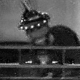

During reach generated image


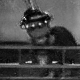

After reach generated image


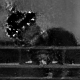

In [43]:
from IPython.display import display, Image

# Path to the folder containing images
folder_path = 'C:\\Users\\Chandra\\Desktop\\Model\\NeuroVidGenImages'

# List of specific image filenames
image_filenames = [
    'generated_image_8_class_410.png',
    'generated_image_9_class_510.png',
    'generated_image_9_class_610.png'
]

# Define the original width of the images
original_width = 200  # Replace this with the original width of your images

# Calculate the new width (twice the original width)
new_width = original_width * 2

# Display each selected image with twice the original width
for idx, image_file in enumerate(image_filenames):
    if idx == 0:
        print("Before reach generated image")
    elif idx == 1:
        print("During reach generated image")
    else:
        print("After reach generated image")
    
    image_path = folder_path + "\\" + image_file
    display(Image(filename=image_path, width=new_width))
